In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv


# Load and clean the dataset

In [2]:
data = pd.read_csv("/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

We have a clean dataset with no missing values.

In [3]:
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Check if each customer is unique in this dataset
len(data["Customer"]) == len(data["Customer"].unique())

True

In [5]:
data.describe(include="all")

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BS91566,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


# Summary statistics

Distrbution across gender, education, employment, policy type, sales channel

In [6]:
import plotly.express as px

In [7]:
# Income distribution
fig = px.histogram(data, x="Income", title="Distribution of income")
fig.show()

In [8]:
(data["Income"]>0).value_counts()/len(data)
# ~25% customers report zero income.

True     0.746332
False    0.253668
Name: Income, dtype: float64

In [9]:
data[data["Income"]>0].describe()["Income"]

count     6817.000000
mean     50456.580461
std      24305.956566
min      10037.000000
25%      28432.000000
50%      48081.000000
75%      70187.000000
max      99981.000000
Name: Income, dtype: float64

In [10]:
data["IncomeGroup"] = pd.cut(data["Income"], [10000, 30000, 50000, 70000, data["Income"].max()], 
       labels=["10K - 30K", "30K - 50K", "50K - 70K", "Above 70K"], ordered=False)
data["IncomeGroup"] = data["IncomeGroup"].astype(str)
data["IncomeGroup"].fillna("Zero Income", inplace=True)

In [11]:
features = ["State", "Education", "EmploymentStatus", "Gender", "Marital Status", "Location Code", "IncomeGroup", "Sales Channel", "Vehicle Class", "Vehicle Size"]
for col in features:
    temp = pd.DataFrame(data[col].value_counts())
    temp.reset_index(inplace=True)
    temp.columns = [col, "Count"]
    fig = px.pie(temp, values="Count", names=col, title="Number of customers grouped by "+col)
    fig.show()

In [12]:
data["zero_income"] = [1 if x==0 else 0 for x in data["Income"]]
for col in features:
    temp = pd.DataFrame(data.groupby(col).mean()["zero_income"])
    temp.reset_index(inplace=True)
    temp.columns = [col, "% reported zero income"]
    fig = px.bar(temp, x=col, y="% reported zero income", title="% with zero income grouped by "+col)
    fig.show()
# We find out all of them are unemployed.

All zero-income customers are unemployed, so we can keep these observations.

# Correlation between different variables and CLV

In [13]:
data.describe()["Customer Lifetime Value"]
# We see there is significant variance in CLV. The huge gap between the 75% percentile and the max suggests potential outliers.

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [14]:
np.percentile(data["Customer Lifetime Value"], 99)
# Check the 99% percentile

35971.1045203

In [15]:
np.percentile(data["Customer Lifetime Value"], 98)
# Check the 98% percentile

30171.793922600005

In [16]:
for col in features:
    fig = px.box(data, x=col, y="Customer Lifetime Value", title="Boxplot of CLV grouped by "+col)
    fig.show()

# Regression analysis on CLV

The model has a low adjusted R-squared score (0.129) and thus a low explaining power.

Nevertheless, the model suggests some variables with significant impacts on CLV:

* Female customers have higher CLV than male customers assuming all other things equal.
* Divorced and married customers have higher CLV than single customers.
* Customers with average income (i.e., 30K - 50K) have higher CLV than customers in other income groups.
* Being employeed is associated with an uplift of 448 comapred to the umemployeed group.
* If the insured vehicles are luxury cars, SUV or sports cars, then the customer contributes to a higher CLV.
* Customers with small and medium-size cars also tend to have higher CLV.

Overall, marital status, income and employment status have the strongest explaining power, and we should pay more attention to these factors when examining results from Kmeans clustering.

In [17]:
# One-hot encoding of categorical variables
X = data["Income"]
for col in features:
    dummies = pd.get_dummies(data[col])
    data = pd.concat([data, dummies], axis=1)
    X = pd.concat([X, dummies.iloc[:, :-1]], axis=1)

In [18]:
# Run Linear Regresion
import statsmodels.api as sm
from scipy import stats
y = data["Customer Lifetime Value"]
X = sm.add_constant(X.drop(columns="Income", axis=1))
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.132
Model:                                 OLS   Adj. R-squared:                  0.129
Method:                      Least Squares   F-statistic:                     46.25
Date:                     Mon, 25 Oct 2021   Prob (F-statistic):          3.78e-253
Time:                             12:25:43   Log-Likelihood:                -93012.
No. Observations:                     9134   AIC:                         1.861e+05
Df Residuals:                         9103   BIC:                         1.863e+05
Df Model:                               30                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6120.4568    484.761     12.626      0.000    5170.216    7070.698
Arizona               -204.2648    275.444     -0.742      0.458    -744.196     335.667
California            -147.3490    254.417     -0.579      0.562    -646.064     351.366
Nevada                -118.3466    313.667     -0.377      0.706    -733.204     496.511
Oregon                 -89.8908    259.800     -0.346      0.729    -599.158     419.376
Bachelor              -177.6793    267.893     -0.663      0.507    -702.809     347.451
College               -195.4247    268.651     -0.727      0.467    -722.041     331.192
Doctor                -468.6887    420.058     -1.116      0.265   -1292.097     354.720
High School or Below   185.5243    271.525      0.683      0.494    -346.726     717.775
Disabled               -33.2587    320.806     -0.104      0.917    -662.111     595.594
Employed               448.0998    163.995      2.732      0.006     126.633     769.567
Medical Leave          140.5352    312.109      0.450      0.653    -471.268     752.339
Retired               -238.3213    369.518     -0.645      0.519    -962.659     486.016
F                      255.7205    135.165      1.892      0.059      -9.234     520.675
Divorced               541.3807    227.634      2.378      0.017      95.167     987.594
Married                216.9229    171.383      1.266      0.206    -119.027     552.873
Rural                  -25.0924    222.074     -0.113      0.910    -460.408     410.223
Suburban               -97.1448    202.416     -0.480      0.631    -493.925     299.635
10K - 30K               61.4191    159.980      0.384      0.701    -252.178     375.016
30K - 50K              310.3221    211.276      1.469      0.142    -103.827     724.471
50K - 70K              -90.6331    215.281     -0.421      0.674    -512.632     331.366
Above 70K               35.9469    213.818      0.168      0.866    -383.184     455.078
Agent                  194.5937    207.334      0.939      0.348    -211.827     601.014
Branch                 380.5124    217.350      1.751      0.080     -45.542     806.566
Call Center            369.2838    233.666      1.580      0.114     -88.755     827.322
Four-Door Car          -45.9965    175.589     -0.262      0.793    -390.191     298.198
Luxury Car            1.039e+04    524.952     19.795      0.000    9362.459    1.14e+04
Luxury SUV            1.046e+04    496.607     21.065      0.000    9487.465    1.14e+04
SUV                   3775.9601    211.859     17.823      0.000    3360.669    4191.251
Sports Car            4107.7174    327.753     12.533      0.000    3465.248    4750.187
Large                 -484.0741    260.477     -1.858      0.063    -994.669      26.520
Me

# Kmeans clustering

In [19]:
from sklearn.cluster import KMeans as km
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [20]:
# Try different number of clusters and select the optimal k using the elbow method
inertias = []
for k in range(1,10):
    kmeans = km(n_clusters=k).fit(X)
    inertias.append(kmeans.inertia_)

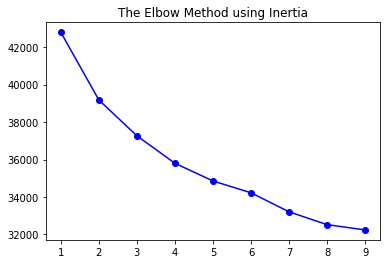

In [21]:
plt.plot(range(1,10), inertias, "bo-")
plt.title("The Elbow Method using Inertia")
plt.show()
# We decide to move forward with 4 clusters.

In [22]:
kmeans = km(3, random_state=1).fit(X)
data["KMeansLabel"] = kmeans.labels_
data["KMeansLabel"].value_counts()

1    3237
2    3205
0    2692
Name: KMeansLabel, dtype: int64

In [23]:
for col in ["Customer Lifetime Value", "Number of Policies", "Total Claim Amount"]:
    temp = pd.DataFrame(data.groupby("KMeansLabel").mean()[col])
    temp.reset_index(inplace=True)
    fig = px.bar(temp, x="KMeansLabel", y=col, title="Avg. "+col+" grouped by KMeansLabel")
    fig.show()
# We check customer quality across clusters.

In [24]:
for col in features:
    temp = data.pivot_table(values="Customer", index=["KMeansLabel", col], aggfunc="count")
    temp.reset_index(inplace=True)
    fig = px.bar(temp, x="KMeansLabel", y="Customer", color=col, title="Distribution of "+col+" across Clusters")
    fig.show()
# We check the distribution of features across clusters.

## Conclusions drawn from KMean clusters

### Customer quality
* The three clusters show in terms of CLV: Cluster 0 > 2 > 1 (8,300 > 8,000 > 7,700).
* Cluster 2 have the lowest claim amount.

### Customer profile
* Cluster 0: Live in suburban areas, employed, married
* Cluster 1: Live in suburban areas, unemployed, single
* Cluster 2: Live in rural or urban areas (not suburban), employed, income above 50K


# Generate manual clusters based on our learnings so far

In [25]:
# Generate filters based on the findings above
data["KMeansLabel_manual"] = "Others"
data.loc[(data["Location Code"]=="Suburban") & (data["EmploymentStatus"]=="Employed") & (data["Marital Status"]!="Single"), "KMeansLabel_manual"] = "Suburb family"
data.loc[(data["EmploymentStatus"]=="Unemployed"), "KMeansLabel_manual"] = "Unemployed"
data.loc[(data["Location Code"]=="Rural") & (data["EmploymentStatus"]=="Employed") & (data["Income"]>=50000), "KMeansLabel_manual"] = "Rural high-income employee"
data.loc[(data["Location Code"]=="Urban") & (data["EmploymentStatus"]=="Employed"), "KMeansLabel_manual"] = "Urban employee"
data["KMeansLabel_manual"].value_counts()

Unemployed                    2317
Suburb family                 2214
Others                        2137
Urban employee                1414
Rural high-income employee    1052
Name: KMeansLabel_manual, dtype: int64

## Revisit manually-generated clusters and their characteristics

* The four identifiable clusters account for 77% of the whole sample.
* Rural high-income employee and suburb family groups have the highest CLV (8,300+), whereas the unemployed contribute the least (7,600). Urban employees stands somewhere in between (8,100).
* One reason behind high value of rural high-income employee is that they have the lowest claim amount on average.

In [26]:
for col in ["Customer Lifetime Value", "Number of Policies", "Total Claim Amount"]:
    temp = pd.DataFrame(data.groupby("KMeansLabel_manual").mean()[col])
    temp.reset_index(inplace=True)
    fig = px.bar(temp, x="KMeansLabel_manual", y=col, title="Avg. "+col+" grouped by KMeansLabel (Manual)")
    fig.show()

In [27]:
for col in features:
    temp = data.pivot_table(values="Customer", index=["KMeansLabel_manual", col], aggfunc="count")
    temp.reset_index(inplace=True)
    fig = px.bar(temp, x="KMeansLabel_manual", y="Customer", color=col, title="Distribution of "+col+" across KMean Clusters (Manual)", )
    fig.show()

# Examine statistical significance using pairwise Tukey test

At a significance level of 0.15, the group Rural high-income employee, Suburb family and Urban employee have significantly higher CLV than the remaining groups, although the difference between each group is not statistically significant.

This means, we are able to identify high-value customer groups with clear criteria for targeting.

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [29]:
tukey_results = pairwise_tukeyhsd(endog=data["Customer Lifetime Value"], groups=data["KMeansLabel_manual"], alpha=0.15)
print(tukey_results)

                       Multiple Comparison of Means - Tukey HSD, FWER=0.15                        
          group1                     group2            meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------------------------------------
                    Others Rural high-income employee  560.1061 0.1928   -30.5979 1150.8102  False
                    Others              Suburb family  503.8685 0.1101    28.2527  979.4843   True
                    Others                 Unemployed -168.0218    0.9  -638.4168  302.3731  False
                    Others             Urban employee   365.474 0.5242  -172.1779  903.1259  False
Rural high-income employee              Suburb family  -56.2376    0.9  -643.5433  531.0681  False
Rural high-income employee                 Unemployed  -728.128 0.0353 -1311.2137 -145.0422   True
Rural high-income employee             Urban employee -194.6321    0.9  -833.2142    443.95  False
          

# Visualising clusters using PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [31]:
# Transform all features used for KMeans clustering into 2 dimensions for a 2D scatter plot
reduced_dimensions = pd.DataFrame(pca.fit_transform(X))
reduced_dimensions.columns = ["PCA1", "PCA2"]
data = pd.concat([data, reduced_dimensions], axis=1)

The plot shows that the four groups we defined stay rather distinct from each other, with the group "Others" scattering across the plot.

In [32]:
fig = px.scatter(data, x="PCA1", y="PCA2", color="KMeansLabel_manual", title="Plot of Manually Defined Clusters based on PCA")
fig.show()